In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, VotingRegressor 
import sklearn.model_selection
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
valid_part = 0.3
pd.set_option('max_columns',100)

In [3]:
data = pd.read_csv('/Users/rupesh/Downloads/dmmlfinalproject/datasets/citywide-payroll-data-fiscal-year.csv')
data.head(5)

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,67.0,ADMIN FOR CHILDREN'S SVCS,MAKHRINSKY,IRINA,NaN,2011-10-03T00:00:00.000,MANHATTAN,STAFF ANALYST,ACTIVE,81509.0,per Annum,1820.0,79329.44,0.00,0.00,0.00
1,2020,67.0,ADMIN FOR CHILDREN'S SVCS,ACEVEDO,MIGUELINA,P,2006-02-27T00:00:00.000,BRONX,CHILD PROTECTIVE SPECIALIST SUPERVISOR,ACTIVE,86096.0,per Annum,1820.0,89599.83,142.25,9830.52,4501.92
2,2020,67.0,ADMIN FOR CHILDREN'S SVCS,ARGUETA,REGINA,A,2015-02-09T00:00:00.000,BROOKLYN,CHILD PROTECTIVE SPECIALIST,ACTIVE,60327.0,per Annum,1820.0,58937.60,336.00,14387.01,2027.07
3,2020,67.0,ADMIN FOR CHILDREN'S SVCS,SANTOS,WESLEY,NaN,2017-02-21T00:00:00.000,MANHATTAN,PROGRAM EVALUATOR,ACTIVE,82987.0,per Annum,1820.0,79325.99,0.00,0.00,0.00
4,2020,67.0,ADMIN FOR CHILDREN'S SVCS,BURKE,KEVIN,C,2000-03-13T00:00:00.000,MANHATTAN,ADMINISTRATIVE DIRECTOR OF SOCIAL SERVICES,ACTIVE,90764.0,per Annum,1820.0,89370.34,0.00,0.00,795.64


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3923290 entries, 0 to 3923289
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Fiscal Year                 int64  
 1   Payroll Number              float64
 2   Agency Name                 object 
 3   Last Name                   object 
 4   First Name                  object 
 5   Mid Init                    object 
 6   Agency Start Date           object 
 7   Work Location Borough       object 
 8   Title Description           object 
 9   Leave Status as of June 30  object 
 10  Base Salary                 float64
 11  Pay Basis                   object 
 12  Regular Hours               float64
 13  Regular Gross Paid          float64
 14  OT Hours                    float64
 15  Total OT Paid               float64
 16  Total Other Pay             float64
dtypes: float64(7), int64(1), object(9)
memory usage: 508.8+ MB


In [5]:
data.isna().sum()

Fiscal Year                         0
Payroll Number                1745440
Agency Name                         0
Last Name                        2048
First Name                       2074
Mid Init                      1594328
Agency Start Date                  63
Work Location Borough          506226
Title Description                  83
Leave Status as of June 30          0
Base Salary                         0
Pay Basis                           0
Regular Hours                       0
Regular Gross Paid                  0
OT Hours                            0
Total OT Paid                       0
Total Other Pay                     0
dtype: int64

In [6]:
drop_columns = ['Last Name', 'First Name', 'Mid Init']
data = data.drop(columns = drop_columns)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3923290 entries, 0 to 3923289
Data columns (total 14 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Fiscal Year                 int64  
 1   Payroll Number              float64
 2   Agency Name                 object 
 3   Agency Start Date           object 
 4   Work Location Borough       object 
 5   Title Description           object 
 6   Leave Status as of June 30  object 
 7   Base Salary                 float64
 8   Pay Basis                   object 
 9   Regular Hours               float64
 10  Regular Gross Paid          float64
 11  OT Hours                    float64
 12  Total OT Paid               float64
 13  Total Other Pay             float64
dtypes: float64(7), int64(1), object(6)
memory usage: 419.1+ MB


In [8]:
data = data.dropna()
data.shape

(1728672, 14)

In [9]:
data.isna().sum()

Fiscal Year                   0
Payroll Number                0
Agency Name                   0
Agency Start Date             0
Work Location Borough         0
Title Description             0
Leave Status as of June 30    0
Base Salary                   0
Pay Basis                     0
Regular Hours                 0
Regular Gross Paid            0
OT Hours                      0
Total OT Paid                 0
Total Other Pay               0
dtype: int64

In [10]:
# Determination categorical features
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = data.columns.values.tolist()
for col in features:
    if data[col].dtype in numerics: continue
    categorical_columns.append(col)
# Encoding categorical features
for col in categorical_columns:
    if col in data.columns:
        le = LabelEncoder()
        le.fit(list(data[col].astype(str).values))
        data[col] = le.transform(list(data[col].astype(str).values))

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728672 entries, 0 to 3921598
Data columns (total 14 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Fiscal Year                 int64  
 1   Payroll Number              float64
 2   Agency Name                 int64  
 3   Agency Start Date           int64  
 4   Work Location Borough       int64  
 5   Title Description           int64  
 6   Leave Status as of June 30  int64  
 7   Base Salary                 float64
 8   Pay Basis                   int64  
 9   Regular Hours               float64
 10  Regular Gross Paid          float64
 11  OT Hours                    float64
 12  Total OT Paid               float64
 13  Total Other Pay             float64
dtypes: float64(7), int64(7)
memory usage: 197.8 MB


In [12]:
data['Agency Start Date'] = (data['Agency Start Date']-1900).astype(int)
data['Payroll Number'] = data['Payroll Number'].astype(int)
data['Base Salary'] = data['Base Salary'].astype(int)
data['Regular Hours'] = data['Regular Hours'].astype(int)
data['Regular Gross Paid'] = data['Regular Gross Paid'].astype(int)
data['OT Hours'] = data['OT Hours'].astype(int)
data['Total OT Paid'] = data['Total OT Paid'].astype(int)
data['Total Other Pay'] = data['Total Other Pay'].astype(int)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728672 entries, 0 to 3921598
Data columns (total 14 columns):
 #   Column                      Dtype
---  ------                      -----
 0   Fiscal Year                 int64
 1   Payroll Number              int64
 2   Agency Name                 int64
 3   Agency Start Date           int64
 4   Work Location Borough       int64
 5   Title Description           int64
 6   Leave Status as of June 30  int64
 7   Base Salary                 int64
 8   Pay Basis                   int64
 9   Regular Hours               int64
 10  Regular Gross Paid          int64
 11  OT Hours                    int64
 12  Total OT Paid               int64
 13  Total Other Pay             int64
dtypes: int64(14)
memory usage: 197.8 MB


In [14]:
data.head(5)

,Fiscal Year,Payroll Number,Agency Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,67,0,8654,6,1426,0,81509,1,1820,79329,0,0,0
1,2020,67,0,6870,1,420,0,86096,1,1820,89599,142,9830,4501
2,2020,67,0,9768,2,419,0,60327,1,1820,58937,336,14387,2027
3,2020,67,0,10467,6,1194,0,82987,1,1820,79325,0,0,0
4,2020,67,0,4952,6,90,0,90764,1,1820,89370,0,0,795


In [15]:
data = data[data['Regular Gross Paid'] > 10000]
data = data[data['Regular Gross Paid'] < 80000]
data = data[data['Agency Start Date'] > 110]

In [16]:
data = data[data['Regular Hours'] > 100]
data = data[data['OT Hours'] > 100]
data = data[data['Total OT Paid'] > 100]
data = data[data['Total Other Pay'] > 100]

In [17]:
data.shape

(163646, 14)

In [18]:
data.describe()

,Fiscal Year,Payroll Number,Agency Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
count,163646.000000,163646.000000,163646.000000,163646.000000,163646.000000,163646.000000,163646.000000,163646.000000,163646.000000,163646.000000,163646.000000,163646.000000,163646.000000,163646.000000
mean,2019.000373,344.780917,90.140382,8296.428199,5.730333,951.273627,0.064358,52268.969911,1.061896,1941.720910,52115.927795,328.442351,13223.901715,5799.755900
std,0.824363,388.553139,34.822247,2628.339965,3.988320,395.870415,0.314597,18343.448759,0.294988,242.931125,13682.788795,201.231820,9524.838141,5655.483869
min,2018.000000,2.000000,0.000000,111.000000,0.000000,15.000000,0.000000,13.000000,0.000000,102.000000,10026.000000,101.000000,865.000000,101.000000
25%,2018.000000,56.000000,66.000000,6635.000000,2.000000,557.000000,0.000000,43901.000000,1.000000,1825.000000,42911.250000,181.000000,6553.000000,1778.000000
50%,2019.000000,69.000000,90.000000,9410.000000,6.000000,1151.000000,0.000000,50604.000000,1.000000,2045.000000,49990.000000,278.000000,10463.000000,4351.000000
75%,2020.000000,827.000000,127.000000,10345.000000,11.000000,1256.000000,0.000000,63125.000000,1.000000,2080.000000,61065.000000,418.000000,17229.750000,7517.000000
max,2020.000000,996.000000,155.000000,11612.000000,17.000000,1598.000000,4.000000,148745.000000,3.000000,2346.000000,79999.000000,2551.000000,162000.000000,81666.000000


In [19]:
data.corr()

,Fiscal Year,Payroll Number,Agency Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
Fiscal Year,1.000000,-0.033550,0.078017,0.131353,-0.003341,0.026755,0.022316,0.005970,0.006112,0.036166,0.006519,0.033504,-0.057982,0.031922
Payroll Number,-0.033550,1.000000,-0.176048,-0.171095,0.071246,-0.107657,-0.007991,-0.087310,0.242985,0.006234,0.154372,-0.051382,0.083975,0.160858
Agency Name,0.078017,-0.176048,1.000000,0.010816,-0.103759,0.318988,-0.008603,-0.150120,-0.011995,0.174651,-0.170640,-0.034864,-0.129900,-0.066302
Agency Start Date,0.131353,-0.171095,0.010816,1.000000,0.001375,0.012390,-0.079160,-0.245191,0.024714,0.064320,-0.354922,-0.096728,-0.275664,-0.261054
Work Location Borough,-0.003341,0.071246,-0.103759,0.001375,1.000000,-0.046327,0.008490,0.025626,0.029359,0.014580,0.069145,0.026052,0.049369,0.020298
Title Description,0.026755,-0.107657,0.318988,0.012390,-0.046327,1.000000,-0.015448,0.077771,-0.069400,0.136933,0.062776,0.045352,0.057759,0.244149
Leave Status as of June 30,0.022316,-0.007991,-0.008603,-0.079160,0.008490,-0.015448,1.000000,0.050184,0.020815,-0.409358,-0.116881,-0.081309,-0.036789,0.048094
Base Salary,0.005970,-0.087310,-0.150120,-0.245191,0.025626,0.077771,0.050184,1.000000,-0.606733,0.043994,0.578660,0.007121,0.208106,0.479890
Pay Basis,0.006112,0.242985,-0.011995,0.024714,0.029359,-0.069400,0.020815,-0.606733,1.000000,-0.188033,0.034454,0.000792,0.057739,-0.050696
Regular Hours,0.036166,0.006234,0.174651,0.064320,0.014580,0.136933,-0.409358,0.043994,-0.188033,1.000000,0.278612,0.160563,0.078815,0.097073


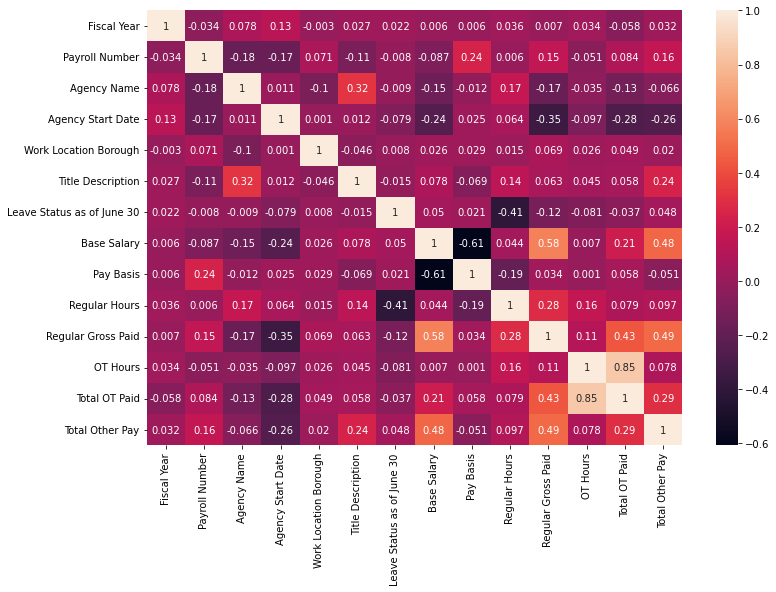

In [20]:
# heatmap to find correlation

plt.figure(figsize = (12,8))
sns.heatmap(np.round(data.corr(), 3), annot= True,  cmap= 'rocket')
plt.show()

## Modelling

In [21]:
train_target0 = data['Regular Gross Paid']
data = data.drop(['Regular Gross Paid'], axis=1)

In [22]:
train0=data
# Synthesis test0 from train0
train0, test0, train_target0, test_target0 = train_test_split(train0, train_target0, test_size=0.2, random_state=0)

In [23]:
# For boosting model
train0b = train0
train_target0b = train_target0
# Synthesis valid as test for selection models
trainb, testb, targetb, target_testb = train_test_split(train0b, train_target0b, test_size=valid_part, random_state=0)


In [24]:
#For models from Sklearn
scaler = StandardScaler()
train0 = pd.DataFrame(scaler.fit_transform(train0), columns = train0.columns)

In [25]:
train0.head(3)

,Fiscal Year,Payroll Number,Agency Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,OT Hours,Total OT Paid,Total Other Pay
0,1.211581,-0.74277,1.059852,0.944569,-0.938860,0.519537,-0.204718,-0.396461,-0.209114,0.569684,-1.101594,-1.196032,0.295047
1,1.211581,-0.74277,1.059852,0.677279,-1.189605,0.519537,-0.204718,0.389732,-0.209114,0.569684,1.205432,0.044022,0.764742
2,-1.212821,-0.74277,1.059852,-0.286031,1.317851,1.554713,-0.204718,-0.603150,-0.209114,0.425477,3.562179,2.042051,-0.264156


In [26]:
len(train0)

130916

In [27]:
# Synthesis valid as test for selection models
train, test, target, target_test = train_test_split(train0, train_target0, test_size=valid_part, random_state=0)

In [28]:
train.head(3)

,Fiscal Year,Payroll Number,Agency Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,OT Hours,Total OT Paid,Total Other Pay
76488,-0.000620,-0.742770,1.059852,-1.426011,0.064123,0.812416,-0.204718,-0.301633,-0.209114,0.404876,2.214756,1.501634,-0.780998
76984,-0.000620,-0.742770,1.059852,0.984548,0.064123,1.554713,-0.204718,-0.724784,-0.209114,0.404876,-1.056846,-1.048396,-0.760261
102702,1.211581,-0.740195,-0.002912,0.095105,-0.938860,-1.719978,-0.204718,0.415446,-0.209114,0.034056,-0.882825,-0.716269,-0.636013


In [29]:
test.head(3)

,Fiscal Year,Payroll Number,Agency Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,OT Hours,Total OT Paid,Total Other Pay
113288,1.211581,1.677933,0.743895,-1.289320,0.064123,-1.475070,-0.204718,-0.400283,-0.209114,0.569684,1.807049,1.357368,0.417522
125328,-0.000620,-0.742770,1.059852,-0.329437,-0.938860,0.812416,-0.204718,-0.301633,-0.209114,0.281269,-1.091650,-1.003432,-0.907727
65387,1.211581,-0.709292,0.083258,-2.704586,-1.189605,-1.704829,-0.204718,0.969346,-0.209114,-0.501572,-0.569586,-0.188593,-0.076810


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91641 entries, 76488 to 68268
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fiscal Year                 91641 non-null  float64
 1   Payroll Number              91641 non-null  float64
 2   Agency Name                 91641 non-null  float64
 3   Agency Start Date           91641 non-null  float64
 4   Work Location Borough       91641 non-null  float64
 5   Title Description           91641 non-null  float64
 6   Leave Status as of June 30  91641 non-null  float64
 7   Base Salary                 91641 non-null  float64
 8   Pay Basis                   91641 non-null  float64
 9   Regular Hours               91641 non-null  float64
 10  OT Hours                    91641 non-null  float64
 11  Total OT Paid               91641 non-null  float64
 12  Total Other Pay             91641 non-null  float64
dtypes: float64(13)
memory usage

In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39275 entries, 113288 to 36953
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fiscal Year                 39275 non-null  float64
 1   Payroll Number              39275 non-null  float64
 2   Agency Name                 39275 non-null  float64
 3   Agency Start Date           39275 non-null  float64
 4   Work Location Borough       39275 non-null  float64
 5   Title Description           39275 non-null  float64
 6   Leave Status as of June 30  39275 non-null  float64
 7   Base Salary                 39275 non-null  float64
 8   Pay Basis                   39275 non-null  float64
 9   Regular Hours               39275 non-null  float64
 10  OT Hours                    39275 non-null  float64
 11  Total OT Paid               39275 non-null  float64
 12  Total Other Pay             39275 non-null  float64
dtypes: float64(13)
memory usag

In [32]:
acc_train_r2 = []
acc_test_r2 = []
acc_train_d = []
acc_test_d = []
acc_train_rmse = []
acc_test_rmse = []

In [33]:
def acc_d(y_meas, y_pred):
    # Relative error between predicted y_pred and measured y_meas values
    return mean_absolute_error(y_meas, y_pred)*len(y_meas)/sum(abs(y_meas))

def acc_rmse(y_meas, y_pred):
    # RMSE between predicted y_pred and measured y_meas values
    return (mean_squared_error(y_meas, y_pred))**0.5

In [34]:
def acc_boosting_model(num,model,train,test,num_iteration=0):
    # Calculation of accuracy of boosting model by different metrics
    
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    if num_iteration > 0:
        ytrain = model.predict(train, num_iteration = num_iteration)  
        ytest = model.predict(test, num_iteration = num_iteration)
    else:
        ytrain = model.predict(train)  
        ytest = model.predict(test)

    print('target = ', targetb[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(targetb, ytrain) * 100, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(targetb, ytrain) * 100, 2)
    print('acc(relative error) for train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(targetb, ytrain) * 100, 2)
    print('acc(rmse) for train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('target_test =', target_testb[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(target_testb, ytest) * 100, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(target_testb, ytest) * 100, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_testb, ytest) * 100, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

In [35]:
def acc_model(num,model,train,test):
    # Calculation of accuracy of model Sklearn by different metrics   
  
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    ytrain = model.predict(train)  
    ytest = model.predict(test)

    print('target = ', target[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(target, ytrain) * 100, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(target, ytrain) * 100, 2)
    print('acc(relative error) for train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(target, ytrain) * 100, 2)
    print('acc(rmse) for train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('target_test =', target_test[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(target_test, ytest) * 100, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(target_test, ytest) * 100, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_test, ytest) * 100, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

In [36]:
# Linear Regression

linreg = LinearRegression()
linreg.fit(train, target)
acc_model(0,linreg,train,test)

target =  [46608 38512 59548 77021 62809]
ytrain =  [49317.5104797  42112.23830801 56075.96720145 81423.88809839
 57702.79349327]
acc(r2_score) for train = 79.64
acc(relative error) for train = 8.29
acc(rmse) for train = 615978.91
target_test = [44486 45213 68934 48265 52492]
ytest = [50450.70052226 48263.22627896 65020.98661599 43274.88716124
 49922.79959975]
acc(r2_score) for test = 79.75
acc(relative error) for test = 8.25
acc(rmse) for test = 615680.5


In [37]:
# Random Forest

random_forest = RandomForestRegressor()
random_forest.fit(train, target)
acc_model(6,random_forest,train,test)

target =  [46608 38512 59548 77021 62809]
ytrain =  [46608.   38513.47 59224.76 76925.51 62809.  ]
acc(r2_score) for train = 99.71
acc(relative error) for train = 0.56
acc(rmse) for train = 73172.55
target_test = [44486 45213 68934 48265 52492]
ytest = [44486.   45893.16 68935.76 48265.   51971.14]
acc(r2_score) for test = 98.07
acc(relative error) for test = 1.47
acc(rmse) for test = 189844.56


In [38]:
# Ridge Regressor

ridge = RidgeCV(cv=5)
ridge.fit(train, target)
acc_model(10,ridge,train,test)

target =  [46608 38512 59548 77021 62809]
ytrain =  [49317.83864543 42112.04609439 56075.54300559 81423.08938811
 57702.60178514]
acc(r2_score) for train = 79.64
acc(relative error) for train = 8.29
acc(rmse) for train = 615978.92
target_test = [44486 45213 68934 48265 52492]
ytest = [50451.22948757 48262.96054587 65020.70230666 43275.28599295
 49922.6293162 ]
acc(r2_score) for test = 79.75
acc(relative error) for test = 8.25
acc(rmse) for test = 615680.62


In [39]:
# Bagging Regressor

bagging = BaggingRegressor()
bagging.fit(train, target)
acc_model(11,bagging,train,test)

target =  [46608 38512 59548 77021 62809]
ytrain =  [46608.  38504.4 59500.1 77017.3 62809. ]
acc(r2_score) for train = 99.6
acc(relative error) for train = 0.63
acc(rmse) for train = 86730.55
target_test = [44486 45213 68934 48265 52492]
ytest = [44486.  45931.5 68939.3 48265.  52969.6]
acc(r2_score) for test = 97.87
acc(relative error) for test = 1.56
acc(rmse) for test = 199555.8


In [40]:
# AdaBoost Regression

Ada_Boost = AdaBoostRegressor()
Ada_Boost.fit(train, target)
acc_model(13,Ada_Boost,train,test)

target =  [46608 38512 59548 77021 62809]
ytrain =  [48467.19422636 39669.43891419 55412.53835392 67698.803173
 55652.98449899]
acc(r2_score) for train = 76.28
acc(relative error) for train = 9.95
acc(rmse) for train = 664873.03
target_test = [44486 45213 68934 48265 52492]
ytest = [51619.73939159 42901.83263598 57767.01381208 45557.83228428
 50976.10373962]
acc(r2_score) for test = 76.23
acc(relative error) for test = 9.96
acc(rmse) for test = 667022.43


In [41]:
# Stochastic Gradient Descent

sgd = SGDRegressor()
sgd.fit(train, target)
acc_model(4,sgd,train,test)

target =  [46608 38512 59548 77021 62809]
ytrain =  [49275.57192739 42110.26821636 56121.60940724 81619.32246958
 57722.54953709]
acc(r2_score) for train = 79.6
acc(relative error) for train = 8.32
acc(rmse) for train = 616684.27
target_test = [44486 45213 68934 48265 52492]
ytest = [50813.69265817 48422.94183853 65420.48271327 43468.55172295
 49940.19544239]
acc(r2_score) for test = 79.72
acc(relative error) for test = 8.27
acc(rmse) for test = 616075.91


In [42]:
# Voting Regressor

Voting_Reg = VotingRegressor(estimators=[('lin', linreg), ('ridge', ridge), ('sgd', sgd)])
Voting_Reg.fit(train, target)
acc_model(14,Voting_Reg,train,test)

target =  [46608 38512 59548 77021 62809]
ytrain =  [49353.41716372 42195.24353004 56013.6508629  81389.03142367
 57714.20149186]
acc(r2_score) for train = 79.64
acc(relative error) for train = 8.29
acc(rmse) for train = 616069.68
target_test = [44486 45213 68934 48265 52492]
ytest = [50265.97019453 48370.04953837 64950.55502637 43301.98176024
 49914.38321334]
acc(r2_score) for test = 79.74
acc(relative error) for test = 8.25
acc(rmse) for test = 615728.49


In [43]:
a = {
    'Model': ['Linear Regression', 'Random Forest','RidgeRegressor', 'BaggingRegressor', 
            'AdaBoostRegressor', 'Stochastic Gradient Descent', 'Voting Regressor'],
    'r2_train': acc_train_r2,
    'r2_test': acc_test_r2,
    'd_train': acc_train_d,
    'd_test': acc_test_d,
    'rmse_train': acc_train_rmse,
    'rmse_test': acc_test_rmse
    }
models = pd.DataFrame.from_dict(a, orient='index')
models

,0,1,2,3,4,5,6
Model,Linear Regression,Random Forest,RidgeRegressor,BaggingRegressor,AdaBoostRegressor,Stochastic Gradient Descent,Voting Regressor
r2_train,79.64,99.71,79.64,99.6,79.6,76.28,79.64
r2_test,79.75,98.07,79.75,97.87,79.72,76.23,79.74
d_train,8.29,0.56,8.29,0.63,8.32,9.95,8.29
d_test,8.25,1.47,8.25,1.56,8.27,9.96,8.25
rmse_train,615978.91,73172.55,615978.92,86730.55,616684.27,664873.03,616069.68
rmse_test,615680.5,189844.56,615680.62,199555.8,616075.91,667022.43,615728.49


In [44]:
new_header = models.iloc[0] #grab the first row for the header
models = models[1:] #take the data less the header row
models.columns = new_header #set the header row as the df header
models

Model,Linear Regression,Random Forest,RidgeRegressor,BaggingRegressor,AdaBoostRegressor,Stochastic Gradient Descent,Voting Regressor
r2_train,79.64,99.71,79.64,99.6,79.6,76.28,79.64
r2_test,79.75,98.07,79.75,97.87,79.72,76.23,79.74
d_train,8.29,0.56,8.29,0.63,8.32,9.95,8.29
d_test,8.25,1.47,8.25,1.56,8.27,9.96,8.25
rmse_train,615978.91,73172.55,615978.92,86730.55,616684.27,664873.03,616069.68
rmse_test,615680.5,189844.56,615680.62,199555.8,616075.91,667022.43,615728.49


In [45]:
df1_transposed = models.T # or df1.transpose()
models.columns

Index(['Linear Regression', 'Random Forest', 'RidgeRegressor',
       'BaggingRegressor', 'AdaBoostRegressor', 'Stochastic Gradient Descent',
       'Voting Regressor'],
      dtype='object', name='Model')

In [46]:
df1_transposed.columns

Index(['r2_train', 'r2_test', 'd_train', 'd_test', 'rmse_train', 'rmse_test'], dtype='object')

In [47]:
pd.options.display.float_format = '{:,.2f}'.format

In [48]:
print('Prediction accuracy for models by R2 criterion - r2_test')
df1_transposed.sort_values(by=['r2_test', 'r2_train'], ascending=False)


Prediction accuracy for models by R2 criterion - r2_test


,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test
Model,,,,,,
Random Forest,99.71,98.07,0.56,1.47,"73,172.55","189,844.56"
BaggingRegressor,99.60,97.87,0.63,1.56,"86,730.55","199,555.80"
Linear Regression,79.64,79.75,8.29,8.25,"615,978.91","615,680.50"
RidgeRegressor,79.64,79.75,8.29,8.25,"615,978.92","615,680.62"
Voting Regressor,79.64,79.74,8.29,8.25,"616,069.68","615,728.49"
AdaBoostRegressor,79.60,79.72,8.32,8.27,"616,684.27","616,075.91"
Stochastic Gradient Descent,76.28,76.23,9.95,9.96,"664,873.03","667,022.43"


In [49]:
print('Prediction accuracy for models by RMSE - rmse_test')
df1_transposed.sort_values(by=['rmse_test', 'rmse_train'], ascending=True)

Prediction accuracy for models by RMSE - rmse_test


,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test
Model,,,,,,
Random Forest,99.71,98.07,0.56,1.47,"73,172.55","189,844.56"
BaggingRegressor,99.60,97.87,0.63,1.56,"86,730.55","199,555.80"
Linear Regression,79.64,79.75,8.29,8.25,"615,978.91","615,680.50"
RidgeRegressor,79.64,79.75,8.29,8.25,"615,978.92","615,680.62"
Voting Regressor,79.64,79.74,8.29,8.25,"616,069.68","615,728.49"
AdaBoostRegressor,79.60,79.72,8.32,8.27,"616,684.27","616,075.91"
Stochastic Gradient Descent,76.28,76.23,9.95,9.96,"664,873.03","667,022.43"


In [50]:
df1_transposed = df1_transposed.reset_index()
df1_transposed


,Model,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test
0,Linear Regression,79.64,79.75,8.29,8.25,"615,978.91","615,680.50"
1,Random Forest,99.71,98.07,0.56,1.47,"73,172.55","189,844.56"
2,RidgeRegressor,79.64,79.75,8.29,8.25,"615,978.92","615,680.62"
3,BaggingRegressor,99.60,97.87,0.63,1.56,"86,730.55","199,555.80"
4,AdaBoostRegressor,79.60,79.72,8.32,8.27,"616,684.27","616,075.91"
5,Stochastic Gradient Descent,76.28,76.23,9.95,9.96,"664,873.03","667,022.43"
6,Voting Regressor,79.64,79.74,8.29,8.25,"616,069.68","615,728.49"


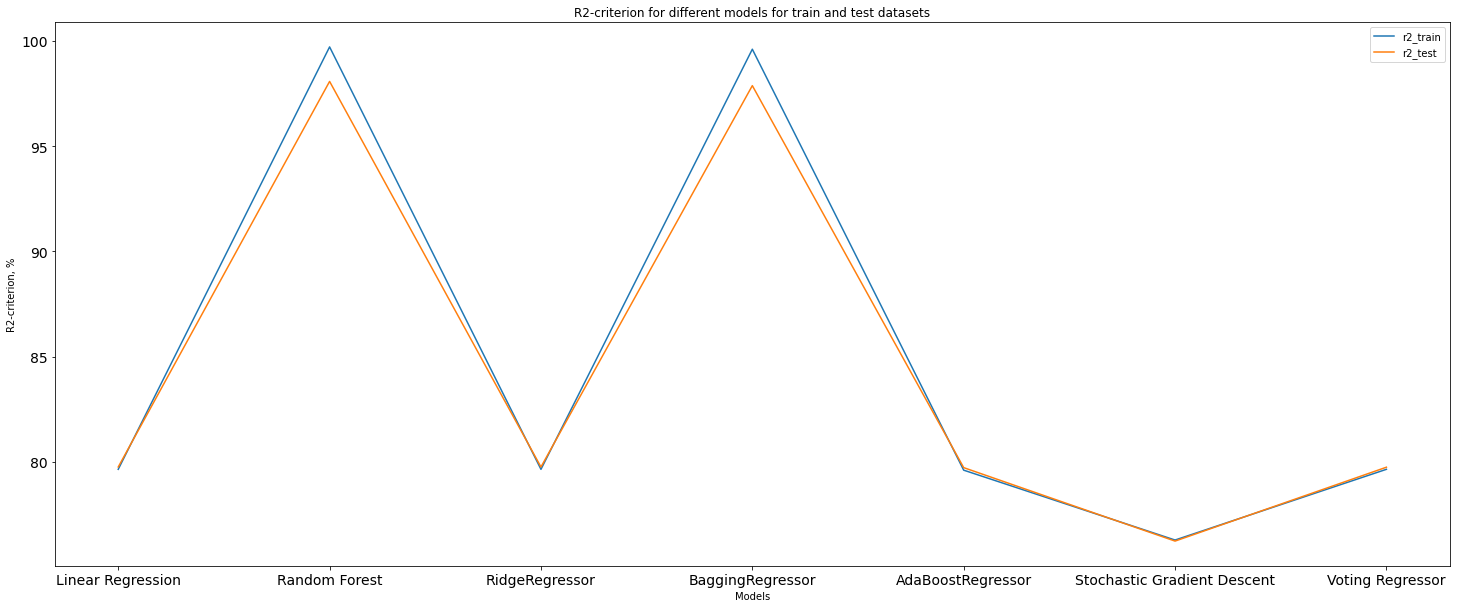

In [51]:
# Plot
plt.figure(figsize=[25,10])
xx = df1_transposed['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, df1_transposed['r2_train'], label = 'r2_train')
plt.plot(xx, df1_transposed['r2_test'], label = 'r2_test')
plt.legend()
plt.title('R2-criterion for different models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('R2-criterion, %')
plt.xticks(xx)
plt.show()

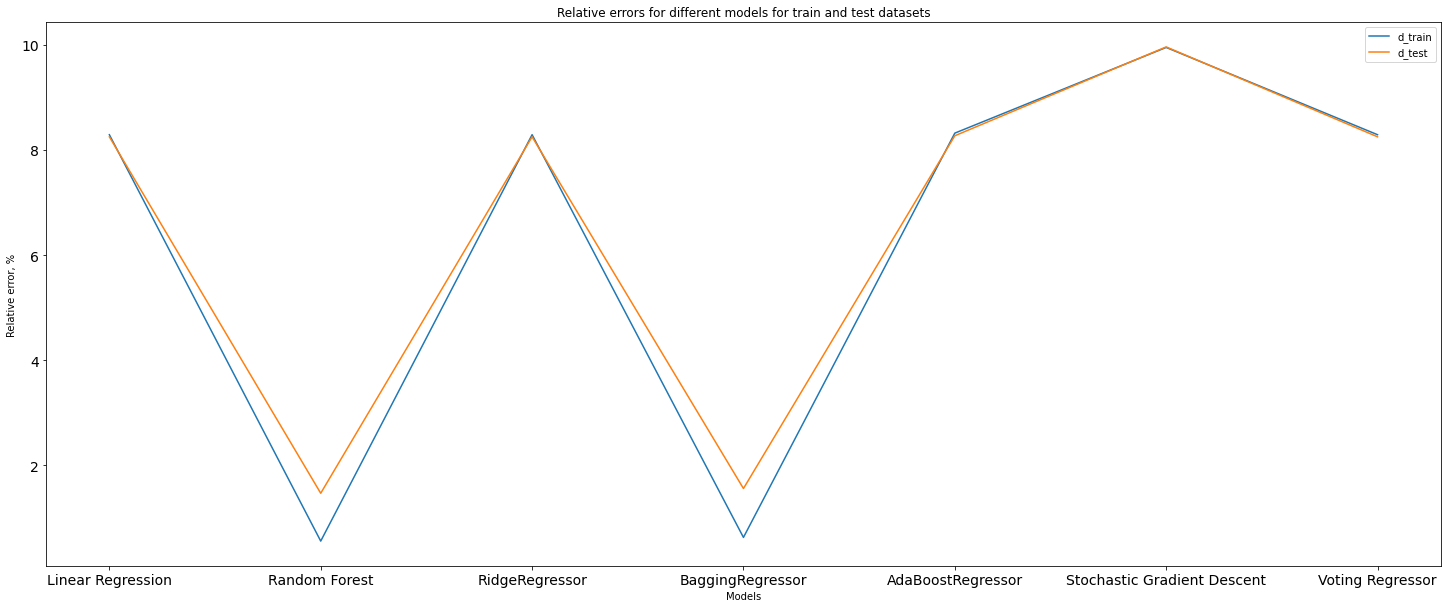

In [52]:
# Plot
plt.figure(figsize=[25,10])
xx = df1_transposed['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, df1_transposed['d_train'], label = 'd_train')
plt.plot(xx, df1_transposed['d_test'], label = 'd_test')
plt.legend()
plt.title('Relative errors for different models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Relative error, %')
plt.xticks(xx)
plt.show()

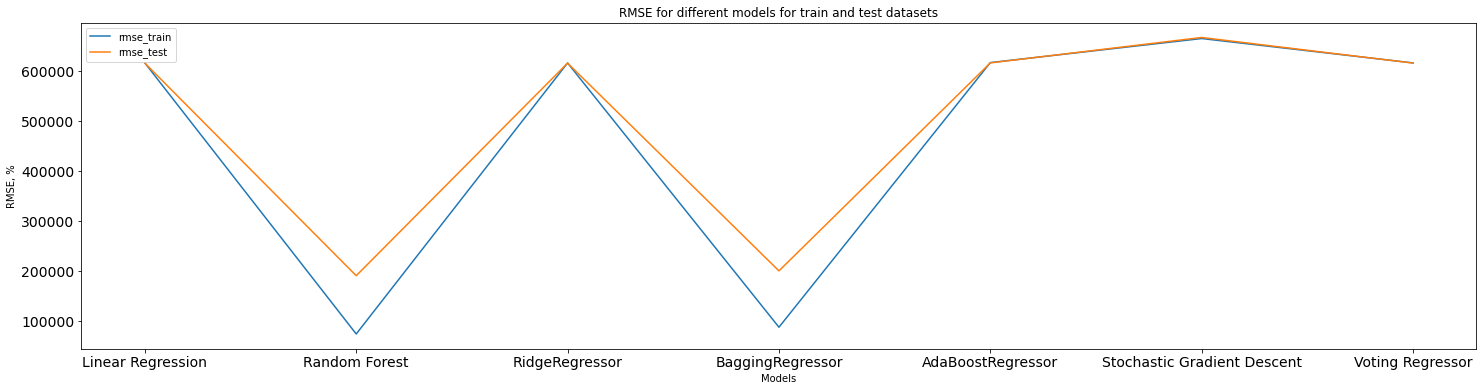

In [53]:
# Plot
plt.figure(figsize=[25,6])
xx = df1_transposed['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, df1_transposed['rmse_train'], label = 'rmse_train')
plt.plot(xx, df1_transposed['rmse_test'], label = 'rmse_test')
plt.legend()
plt.title('RMSE for different models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('RMSE, %')
plt.xticks(xx)
plt.show()